In [1]:
from PyUoI.UoI_Lasso import UoI_Lasso
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('text', usetex = True)
rc('font',**{'family' : 'serif', 'serif' : ['Computer Modern Roman']})
plt.style.use('ggplot')
import numpy as np

In [2]:
def fit_metrics(estimate, true):
    false_positive = np.count_nonzero(estimate[true == 0])
    false_negative = np.count_nonzero(true[estimate == 0])
    bias = estimate - true
    
    # plot
    fig, ax = plt.subplots()
    ax.scatter(true, estimate)
    ax.plot(ax.get_xlim(), ax.get_xlim(), linewidth = 3)
    ax.set_xlabel('True', fontsize = 25)
    ax.set_ylabel('Estimates', fontsize = 25)
    return false_positive, false_negative, bias

In [3]:
def basic_test(n_features=10, n_samples=50, noise_scale=0.5, sparsity=1., groups=np.ones(10)):
    # calculate number of nonzero parameters
    num_nonzero = int(sparsity * n_features)
    # create design matrix
    X = np.random.normal(size=(n_samples, n_features))
    # choose model parameters
    beta = np.zeros(shape=(n_features, 1))
    nonzero_idx = np.random.choice(np.arange(n_features), num_nonzero, replace=True)
    beta[nonzero_idx, 0] = np.random.laplace(size=(num_nonzero))
    # choose noise
    noise = np.random.normal(scale=noise_scale, size=(n_samples, 1))
    # generate output
    y = np.dot(X, beta) + noise
    # run UoI Lasso
    uoi = UoI_Lasso()
    uoi.fit(X, y, groups=groups)
    # compute metrics
    fp, fn, bias = fit_metrics(uoi.coef_, beta.ravel())
    print('False Positives: ', fp)
    print('False Negatives: ', fn)
    plt.show()
    return

[151 236 212  84  27 373 205 178  95 184 354 241 224 274 390 214 233 171
  40 383  86  22 199 198 356 227 345 129 148 360 297  32 167 190 256 273
 305 172 180 263 158 290  76 268  74  46  92  24  63 265  50 159 327 280
 168 393 387 247 357 295 147 341 173 348 248 314 209 359 351 122  67  14
 162  23 222 258  70 377  25 338 376 277 186 117 244 389 170 250 262 210
 207 276 112 152 142 392 303 272 163 165  89 149 313 275 124 261 251 279
 226  10 243  77 374  85 298 347  36 182 278 132 311  42 255 150 379 144
 257  64 161 137 330 239  97 319  37 213 232  19 119 334 301 138 378 361
  38  75 188 135  41 139  69   8   0  15 197 299 285 294  47 397 339 307
 365 281 380 221 391 179 203 384 352 166 201 269 192 252  30  56 126 399
 316 342   4 246   5  39 155 130  87  45 131 220 217 211 343  62 115 375
 181  59 177 120 164 133 169 388 302 249 143 118 326 353 271 127 267  43
 125 264 109 230  20  80 146 218 254  35 315  88 111 106 153 312  93  94
 101 320  33 193  55 237 395 372 306 123 331 175 14

[  7 142  23 387  41 242 167   9 253 151  67 350 251 177 116  37 188  55
 388 173 390 145 308  53 355  72 211  26  79   3 183 202 333 121  95 320
 154 288 127 267  65 339 352 195 160 298 168 304 246 296 111  46 399 328
 305 245 166 182  44 330 226 130 157 311 365  11 190 307 118 385 287 156
 375 280   4 276 198  30  22  43  63 228 170 285 250  85 205 332  64 148
 102 179 241 221  97  36 275 345 274 141 397 300  51 324   1  68 278 234
 258 323 222  69 149 348 138 317   6 247 377 174 114 272 180 150 229 225
 100 368 112 353 153  83 325 370 269 126 129  74 218 313 103  18 165 119
  82 364 358  47 161  16 191 236  17 284 262 344 374 224 338 336 327 255
 240  89  49  59 200 215 382 356 147  35  27 187 232  70 137 273 283 196
 277  76 223 176 110 292 282 393 257 186 369 143  66  62 299 319 113 381
 144 172  78 252 248 120 197 115 391 210  88 268 294 396 208 233 314 309
  10 265 230 310 315 264 334   5 271 158 231 192 128 286 201 249 379 131
 212  86  71 194  28 239 184 329  29 371  19  87 11

[268 151 137 278 236 124 226  17 163 107 332 253 358 119 115 395 158 196
 240 167 237 328 315 192 258  20 149  99 338 284  67 252  37  47  83 245
 280 373 118  80 193 276   3 364 100 391  41 325  56 359  27 384 108 207
 377  58 371 185 130 372 113  68  92 181  78 220  91 339  90  28 156  50
 231 399  70 305 370 282 347   5  38 235 190 188  94 351 360 383 212  79
 179 306  71 386 336 168  51 164  97 138 182 126   4 343 222 324 159 129
 211 297 191 201 250 287   2 132 272 123 169  21  65  72 303 215 175 281
 327 381  45 374 329 246 214  53  81 153 244 388 273 225 356 265 238 320
  39 314 232  60 202 396 321 277 133 368 310 283 346 393 348  16 363  36
  73 382  42 230 341 291 261  43 219  49  25  12  75 379 228 110 120 296
 221 166 294 173 344 279  59 146 154 353 217 227 257 285 380  30 142 161
 210 116 117 213  34 398 165 174 106 234 183 105   9 102  84   7   1 184
  46 199  95 140 218 135 209 114  64 298 304 256  31  22 171  23  93  44
 311 367 162 148 224 301  89 241 122 206  10 141  4

[272 212 257 382 170 167 209 364 311 238 284  42 273 331  39 163 377 161
 348 249  37  19 158 330 211 277 164 245 208 387 397 226 134 393 106 131
  68 101 255  87 196   9 191 299 203 355 236  67  22  14 169 125 302 317
 113  69 237 121 178   5  97  31 227 384 343 256 260 117  86 386 287 111
 202 108 205 183 391 235  11 358 222 379 327  98  26 288 320 301 276 289
 253 374 279 149 316 269 313  53  65 297 303 116 185  78 338 283 335  71
 340 165 308 144 242  55  23 140  74  88 395 264  59 188  99 381 363 221
 347  13 213 115  40 129  60 318   6 112 233  57 215 290 251 184 376 282
 268  17  24 127 216 398 197 244 342 305 124 229 195 371 100 217 351  10
 206 147 204  30  84  29 369 334 352  73 141  90 162   0 263 372 383  72
 177 322 118 315 360  62  36  33  38 306  46 385 362 148 110  20 295  54
 186 368 304  77  35   8  48   2 176 153  45 357 218 139 250 128 267 312
  61  70 228 207 373  85  66 126 145 137 380 370 350 399 150 291 329 224
 274  95  76 199 138  82 341 166 132  43 173  51 25

[138 309 366  96 196 267 217 203 110 231 227 226 212 244 171 283 301 257
 108 313  16 159   2 129 124 395 246 188 321  17 352 152 142  83  89  77
  31  98 302 248 296 233 343  66 222  13 289 371 376  58 193 251 263 380
 112 162 306 220 210 339  95 215 157 133  54 268 115 362  50   3  73 354
  18 377 265  47  35  80 143 252 224  11 312 107 314  87  38 269 167 191
 334  39 382 359 179 202 201 266 207 230 119 166 300 181 367 270 232 206
  91 118 102 387 156 378 173 368  32  68  69 229 103 260   4 286 239 259
 120  33 280 318 360 276 199 349  42  92 348 291 342 384 315 198  60 242
 353 341 127 114 388 356 399  90 394 290 274  23 225  62 369  52  64 336
 357 234 319 364 209 130 228  79 241 168  65 383 190 363 396 351  59 307
   8 243  88 111 165 148 346 128  78 164 389 365 288 174 285 275 126 123
 295  10 386  45 189 261 373  27 294   7 335 136  29 340 322 277 329  26
 169 200 163 195 158 235 333  74 178 144  30  21 247 125  37  40 184 204
 299 154 304  81 331  93 221 325  46 253  71 137 14

[136 361 322 386 194 379 131 377 148  36  40 383  93 103 398 252  44 278
  76 216 338 387 209  72 312 346 219 134  83 169 107 364 374 127 274 201
 220  33 202   8 385 182 370 170 384  29  35 173  59 306  57 368 307 311
 339 129  19  30 328 302 146  31 213   4  18 355   0 124  65 172  38 251
 282  32 190 399 167  73 248 324 367 363 102 188 199 237 378  49  85 359
 334 233 326 180 115  78 123  95 179 228 389 152 247 272 347 161 113 283
  20 249 200 141 388  51 133 299 325 153 264  28 155 242 375 270 263   5
 271  45 240  88 372 357 397  42  34 376 353  43 166 119 390 100 369 316
 288  55  70  15  97 122  23 241 331 256  12  27 130 217  10  53  37 366
  56 210 231  24 177 303 327 315 221 341 292   2 150 391 184 222  84 250
 246 254 151  67  21 105 114  26 287  89  39 112  92 320 187 125  47 273
 267  75 301  16 362  46 313 132 238 120 110 183 207 314 333 343 189 243
  86 323   1 298 171 227 121 281 381 352  91 186 396 235 319 168 300  58
 109  69 174 294 236 104  17 321 165 225 360 195 19

[194 150 245 105  65 314 217 355 190  84 227 135  60 346 373 230  98 367
 148  62 240 276  58 389 351  50 264  82 229 283 331  59 242 174 340 354
 246  30 321  46  22 258 218 132 155 157  40 312  73 244 292 350  20 290
 305 169 315 241 154 128 343  34 388 270 247 238 165 348 268 119 296  35
  81 214  85 178 299 385  83 248  51 162 391 197  66 171 325 329  37 374
 147 288 271 215 144 267   7 332 198 141 136 181 211 110 159 250 107 318
 219 357 336 167 284 173 333 380 226 142 349  14  24 282  39 298  25 370
 278  42 255 335 395  77 185 316 222 390 266 263 342 109 111 323 131  23
 168 301  63  70 368  41 352 252 208 394 256 175  95 369   5  87 233 279
 249 313  21 130 392 182 311  26  99 393 382 362 137  53  76 201 372 204
 396 151 327 345 302  88 262 216  92 358 195 193 387 371  56  33 269 231
 260 236 223 399 112 186 158  36 320 172 103 120  54 353  90  12 324 101
 232 206 205 239 364 286  93 397 115 145 363 179 102 361  96 183 295 199
 339 134 376 139 224 265 228  29  48 104 210 378 23

[ 46 204 326  57 182  73 184  29  20 220  87  90 121 228 257 164 298 199
 162 305 366 169 339 207 274  47 386 316 237 283 249  56 189 168  95  64
 338 362 369  10 181 276  68 139 143 118 349 324 115 109 159 247 380  80
 173 360 292  34 112 145 111 195 177 116  82 241   5  19 149 393   2 216
 259 367 245 148 355 388 217  51  86 289 297 141 114  33 209 185 294 198
 299 107  16 234  43 375 382 226 205 340 192 253 125 252 279 194 398 219
 175 183 250  40 128 153 171 233  78   7 272  85 248  52 291 313 135 117
  84 348 310 151 364   6 224  54 108 282 327 261  17 238 213 342 287 270
  21  42  88 260 246  55 334 221  61   9 229 372 212  89 301 110  91 285
  77 236 132 113 180  76  15 370 267 154 295 232 281 317 179 302 105 384
 277 290  38 315 258 395  48  58 385  44 268 127 333 129 126   3 365 381
 396 351  79 240  11 361 155 335  31 104  70  24 196 306 345 321  96 197
 391 377 136 371 323 137 346 389 150 300 303 188 157 304 387 218  13 314
 130  97 359  50  65  99 309 222 186  60 103 376  6

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


False Positives:  0
False Negatives:  0


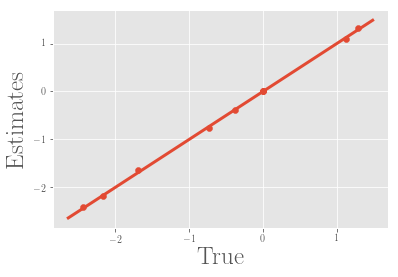

In [6]:
basic_test(n_features=10, n_samples=400, 
           groups=np.ones(400))